## Premise  

Quick overview of the results from the attempted stacked model.  

__TL;DR__  
- The results are not that promising since there is still amajor contibution of mis-prediction of majority class.
- For practical uses there is a problem with high False Negative(?) on Healthy variants. Oops!!

## Imports

In [41]:
import pandas as pd
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt  

%matplotlib inline

## Loading the results

In [42]:
df = pd.read_csv("/Users/vrindaprabhu/Assignments/02_FastAI/FastBook/Homeworks/cassava/cassava_results.csv")
df.head()

,image_id,label,is_val,model3_lab,m3_out,final_output
0,4081341161.jpg,1,True,0,0,1.0
1,408144068.jpg,3,True,1,1,3.0
2,4081836555.jpg,3,True,1,1,3.0
3,4082024517.jpg,3,True,1,0,1.0
4,4082420465.jpg,4,True,0,0,4.0


## Confusion Matrix  

Could not try out the confusion matrix in colab for some reason, just checking it out here.

In [43]:
y_test = df['label'].values.tolist()
y_test = [labels[int(i)] for i in y_test]

pred = df['final_output'].values.tolist()
pred = [labels[int(i)] for i in pred]

labels = ['CBB', 'CBSD', 'CGM', 'CMD', 'Healthy']
cm = confusion_matrix(y_test, pred,labels= labels)

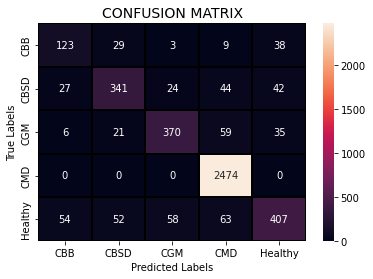

In [63]:
ax= plt.subplot()

sns.heatmap(cm.T, annot=True, fmt="g", linecolor='black', linewidths=1)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels,va='center');

ax.set_title('CONFUSION MATRIX', fontsize=14); 

 ## Most Confused?  
 
 No where as near to the one implemented in the FastAI library, but I wanted to see this in some way!
 Also, a little redundant since the Confusion Matrix already gives this info, yet pie's are always welcome.Not.

In [55]:
df['incorrect'] = df['final_output'] != df['label']
data = df.groupby("label")["incorrect"].sum()
data.index = labels

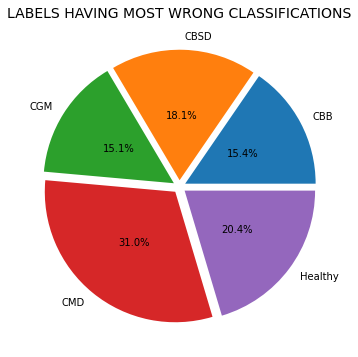

In [64]:
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*len(labels), labels=labels, pctdistance=0.5)
plt.title("LABELS HAVING MOST WRONG CLASSIFICATIONS", fontsize=14);